In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [12]:
df = pd.read_csv("../data/bbc_text_cls.csv")

In [13]:
df.head() 

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [14]:
df['targets'] = df['labels'].astype('category').cat.codes

In [15]:
K = df['targets'].max() + 1
K

5

In [16]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [17]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [18]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens' % V)

Found 27915 unique tokens


In [19]:
# pad sequences so we get N x T
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# sequence length
T = data_train.shape[1]

Shape of data train tensor: (1557, 2824)


In [20]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 2824)


In [27]:
# Model
D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

2024-04-21 13:20:24.432534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-21 13:20:24.433045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-21 13:20:24.433503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [28]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

r = model.fit(
    data_train,
    df_train['targets'],
    epochs=50,
    validation_data=(data_test, df_test['targets'])
)

Epoch 1/50


2024-04-21 13:20:27.191589: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-21 13:20:27.317237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-21 13:20:27.317905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-21 13:20:27.318565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

49/49 [==============================] - ETA: 0s - loss: 1.5996 - accuracy: 0.2460

2024-04-21 13:21:01.088028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-21 13:21:01.088555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-21 13:21:01.089029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

49/49 [==============================] - 36s 712ms/step - loss: 1.5996 - accuracy: 0.2460 - val_loss: 1.5876 - val_accuracy: 0.2171
Epoch 2/50
49/49 [==============================] - 35s 721ms/step - loss: 1.5233 - accuracy: 0.4014 - val_loss: 1.7557 - val_accuracy: 0.2126
Epoch 3/50
49/49 [==============================] - 35s 712ms/step - loss: 1.3346 - accuracy: 0.4348 - val_loss: 1.1469 - val_accuracy: 0.4491
Epoch 4/50
49/49 [==============================] - 34s 699ms/step - loss: 1.0190 - accuracy: 0.5735 - val_loss: 1.0815 - val_accuracy: 0.6228
Epoch 5/50
49/49 [==============================] - 34s 699ms/step - loss: 0.8622 - accuracy: 0.7373 - val_loss: 0.9304 - val_accuracy: 0.5823
Epoch 6/50
49/49 [==============================] - 34s 699ms/step - loss: 0.6902 - accuracy: 0.7983 - val_loss: 0.8141 - val_accuracy: 0.6377
Epoch 7/50
49/49 [==============================] - 34s 700ms/step - loss: 0.6464 - accuracy: 0.7925 - val_loss: 0.8484 - val_accuracy: 0.6931
Epoch 8/50

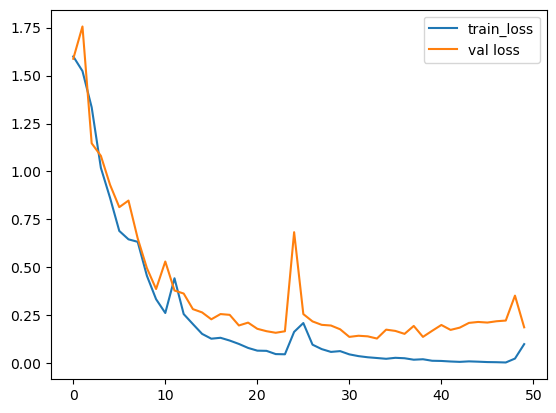

In [29]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

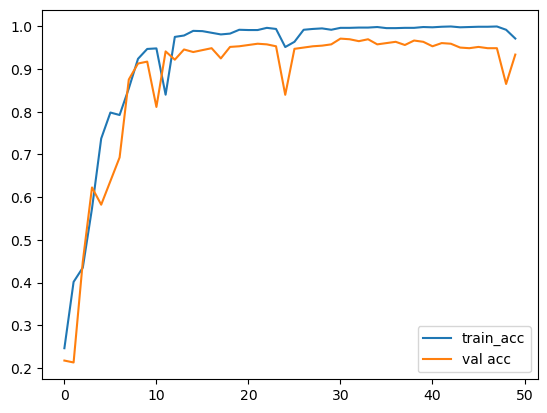

In [30]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()